In [32]:
import torch 
import torch.nn as nn
import torch.nn.functional as f
from torch.utils.data import DataLoader 
from torchvision import datasets,transforms 
from torchvision.utils import make_grid 
import pandas as pd 
import numpy as np 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
%matplotlib inline

In [33]:
# Converting the MNIST image files into a tensor  of 4 dimension
transform = transforms.ToTensor()

In [34]:
train_data = datasets.MNIST(root='/Cnn_data',train = True , download =True,transform = transform)

In [35]:
test_data = datasets.MNIST(root='/Cnn_data',train = False , download =True,transform = transform)

In [36]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /Cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [37]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /Cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [38]:
pwd

'c:\\Users\\Kousimon\\OneDrive\\Desktop\\Data Scientist\\Deep Learning'

In [39]:
ls

 Volume in drive C has no label.
 Volume Serial Number is CAAD-72D7

 Directory of c:\Users\Kousimon\OneDrive\Desktop\Data Scientist\Deep Learning

07/01/2025  09:10 PM    <DIR>          .
06/29/2025  10:30 PM    <DIR>          ..
07/01/2025  09:10 PM    <DIR>          .vscode
07/01/2025  07:22 PM            13,491 Basics of Deep Learning.ipynb
07/03/2025  09:12 PM            52,726 Building_a_Neural_Network.ipynb
07/03/2025  09:17 PM            86,646 Convolutional_Layer.ipynb
07/03/2025  06:49 PM             3,521 Flower_iris_pred.pt
               4 File(s)        156,384 bytes
               3 Dir(s)  73,133,543,424 bytes free


In [40]:
cd ../


c:\Users\Kousimon\OneDrive\Desktop\Data Scientist


In [41]:
cd Deep Learning

c:\Users\Kousimon\OneDrive\Desktop\Data Scientist\Deep Learning


In [42]:
# create a small batch size for images ...about 10 

train_loader = DataLoader(train_data , batch_size = 10 ,shuffle = True)
test_loader = DataLoader(test_data , batch_size = 10 ,shuffle = False)

In [43]:
#Define our CNN Model 
# Describe convolutional layer and what its doing (2 Convolutional layers)
# this is just an example 

conv1 = nn.Conv2d(1, 6, 3, 1)
conv2 = nn.Conv2d(6, 16, 3, 1)


In [44]:
# getting the image 

for i,(x_train,y_train) in enumerate(train_data):
    break 

x_train.shape

torch.Size([1, 28, 28])

In [45]:
x = x_train.view(1,1,28,28)

In [46]:
# Perform first convolutional 
x = f.relu(conv1(x))   # Rectified linear unit 

In [47]:
# 1 single image , 6 is the filters we asked for 26x26
x.shape

torch.Size([1, 6, 26, 26])

In [48]:
# pass thru the pooling layer 
x= f.max_pool2d(x,2,2) #kernal of 2 and stride of 2 

In [49]:
x.shape   # 26 /2 = 13 

torch.Size([1, 6, 13, 13])

In [50]:
# Doing the second convolutional layer 
x = f.relu(conv2(x)) 

In [51]:
x.shape

torch.Size([1, 16, 11, 11])

In [52]:
x = f.max_pool2d(x,2,2)

In [53]:
x.shape

torch.Size([1, 16, 5, 5])

In [ ]:
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,6,3,1)
        self.conv2 = nn.Conv2d(6,16,3,1)
        # fully connected layer 
        self.fc1 = nn.Linear(16*5*5,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)

    def forward(self,X):
        X = f.relu(conv1(X))
        X= f.max_pool2d(X,2,2)  # 2x2 Kernal and stride 2 
        # Second pass 
        X = f.relu(conv2(X))
        X= f.max_pool2d(X,2,2)  # 2x2 Kernal and stride 2 
            
        X=X.view(-1 , 16*5*5)
            
        #Fully connected layer 
        X=f.relu(self.fc1(X))
        X=f.relu(self.fc2(X))
        X=f.relu(self.fc3(X))
        return f.log_softmax(X,dim =1)

In [55]:
# Creating a instance of our model 
torch.manual_seed(41)


In [56]:
model = ConvolutionalNetwork()
model 

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [67]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.0001)  # Smaller the learning rate longer its gonna take the time


In [68]:
import time 
start_time = time.time()

# Create Variables to track things 
epochs = 3
train_losses = []
test_losses =[]
train_correct =[]
test_correct = []

# For loop of epochs
for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    # Train 
    for b,(x_train,y_train) in enumerate(train_loader):
        b+=1
        y_pred = model(x_train)
        loss= criterion(y_pred,y_train)
        predicted = torch.max(y_pred.data,1)[1]  # Add up the number of correct prediction
        batch_corr = (predicted == y_train).sum()  #how many we got correct from this batch
        trn_corr +=batch_corr
        # Update our process 
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()     

# print out some results 
        if b%600 ==0 :
            print(f'Epoche:{i} Batch: {b} loss:{loss.item()}')
    train_losses.append(loss)
    train_correct.append(trn_corr)
    with torch.no_grad():
        for b,(x_test,y_test) in enumerate(test_loader):
            y_val = model(x_test)
            predicted = torch.max(y_val.data ,1)[1]
            tst_corr+=(predicted == y_test).sum()
    loss = criterion(y_val,y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
current_time =time.time()
total = current_time - start_time
print(f'Training Took:{total/60 } minutes ')

Epoche:0 Batch: 600 loss:1.6425527334213257
Epoche:0 Batch: 1200 loss:1.1864537000656128
Epoche:0 Batch: 1800 loss:1.8421308994293213
Epoche:0 Batch: 2400 loss:1.3822021484375
Epoche:0 Batch: 3000 loss:0.9212009310722351
Epoche:0 Batch: 3600 loss:1.8428432941436768
Epoche:0 Batch: 4200 loss:1.1549421548843384
Epoche:0 Batch: 4800 loss:2.0723745822906494
Epoche:0 Batch: 5400 loss:1.6497981548309326
Epoche:0 Batch: 6000 loss:2.1677725315093994
Epoche:1 Batch: 600 loss:1.1553646326065063
Epoche:1 Batch: 1200 loss:0.926622748374939
Epoche:1 Batch: 1800 loss:1.8711388111114502
Epoche:1 Batch: 2400 loss:1.6187403202056885
Epoche:1 Batch: 3000 loss:1.1514129638671875
Epoche:1 Batch: 3600 loss:1.6287128925323486
Epoche:1 Batch: 4200 loss:1.612916350364685
Epoche:1 Batch: 4800 loss:1.8423540592193604
Epoche:1 Batch: 5400 loss:1.6235344409942627
Epoche:1 Batch: 6000 loss:1.6130273342132568
Epoche:2 Batch: 600 loss:1.383749008178711
Epoche:2 Batch: 1200 loss:1.3826204538345337
Epoche:2 Batch: 180

In [69]:
# Visualisation of loss at epoche 

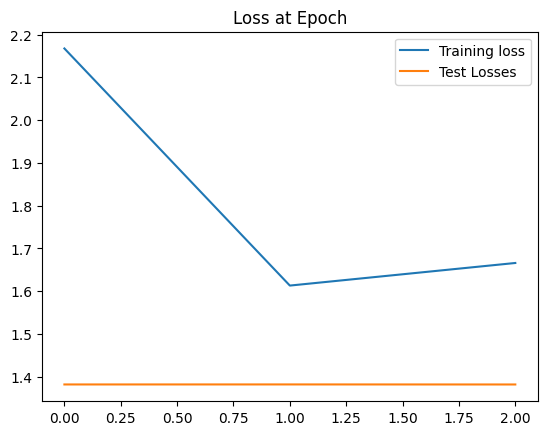

In [70]:
train_losses = [tl.item() for tl in train_losses]

plt.plot(train_losses,label ='Training loss')
plt.plot(test_losses,label ='Test Losses')
plt.title('Loss at Epoch')
plt.legend()

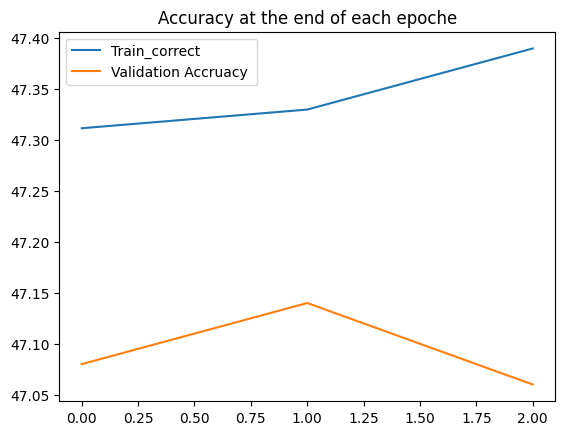

In [71]:
# Accuracy at the end

plt.plot([t/600 for t in train_correct],label='Train_correct')
plt.plot([t/100 for t in test_correct],label ='Validation Accruacy ')
plt.title('Accuracy at the end of each epoche')
plt.legend()